# Linear Classification

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sklearn
import sklearn.datasets
import sklearn.linear_model

## Linear Regression
In statistics, linear regression is a linear approach to modeling the relationship between **a scalar response** (or dependent variable) and one or more explanatory variables (or independent variables).

$$f: \mathbf{X} \rightarrow y, \text{where } \mathbf{X} \in \mathbb{R}^N \text{ and } y \in \mathbb{R},\\
y = a_0 + \sum_{i=1}^N a_i x_i$$

In [2]:
# Load the diabetes dataset
diabetes = sklearn.datasets.load_diabetes()
print(diabetes.data.shape)
print(diabetes.target.shape)

(442, 10)
(442,)


In [3]:
# Use only one feature (3rd)
diabetes_X = diabetes.data[:, 2].reshape((-1, 1))
print(diabetes_X.shape)

(442, 1)


In [4]:
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

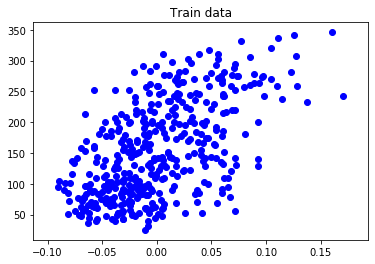

In [5]:
plt.scatter(diabetes_X_train, diabetes_y_train, color='blue')
plt.title('Train data')
plt.show()

In [6]:
# Create linear regression object
regr = sklearn.linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

print('Mean squared error =', sklearn.metrics.mean_squared_error(diabetes_y_test, diabetes_y_pred))

Mean squared error = 2548.0723987259703


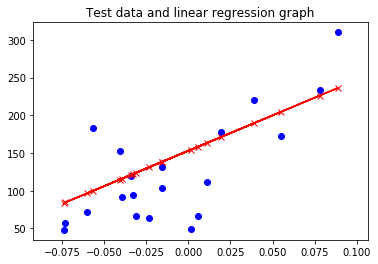

In [7]:
plt.scatter(diabetes_X_test, diabetes_y_test, color='blue')
plt.plot(diabetes_X_test, diabetes_y_pred, color='red', marker='x')
plt.title('Test data and linear regression graph')
plt.show()

### Cost Function

$$J = {1 \over n} \sum_{i=1}^n (pred_i - y_i)^2$$

In statistics, the **mean squared error(MSE)** or mean squared deviation (MSD) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors.

### Gradient Descent

$$J = {1 \over n} \sum_{i=1}^n (a_0 + a_1 x_i - y_i)^2 \\
{\partial J \over \partial a_0} = {2 \over n} \sum_{i=1}^n (a_0 + a_1 x_i - y_i) = {2 \over n} \sum_{i=1}^n (pred_i - y_i) \\
{\partial J \over \partial a_1} = {2 \over n} \sum_{i=1}^n (a_0 + a_1 x_i - y_i) \cdot x_i = {2 \over n} \sum_{i=1}^n (pred_i - y_i) \cdot x_i$$

$$a_0 \leftarrow a_0 - \alpha \cdot {2 \over n} \sum_{i=1}^n (pred_i - y_i) \\
a_1 \leftarrow a_1 - \alpha \cdot {2 \over n} \sum_{i=1}^n (pred_i - y_i) \cdot x_i$$

### Self-implementation

In [8]:
# The number of training data.
n = diabetes_X_train.shape[0]

# Training parameter
a_0 = 0
a_1 = 0

alpha = 0.5
epochs = 0
error_log = []

diabetes_y_train = diabetes_y_train.reshape((n,1))

In [9]:
while epochs < 5000:
    error = a_0 + a_1 * diabetes_X_train - diabetes_y_train
    mean_square_error = np.sum(error**2)
    a_0 = a_0 - alpha * 2 * np.sum(error) / n
    a_1 = a_1 - alpha * 2 * np.sum(error * diabetes_X_train) / n
    epochs += 1
    
    if(epochs % 500 == 0):
        print(round(a_0, 3), round(a_1, 3), round(mean_square_error, 3))
        error_log.append(mean_square_error / n)
        

153.062 636.272 1756557.15
152.965 841.044 1678087.365
152.934 906.954 1669957.922
152.924 928.169 1669115.715
152.92 934.997 1669028.462
152.919 937.195 1669019.423
152.919 937.902 1669018.486
152.919 938.13 1669018.389
152.919 938.203 1669018.379
152.919 938.227 1669018.378


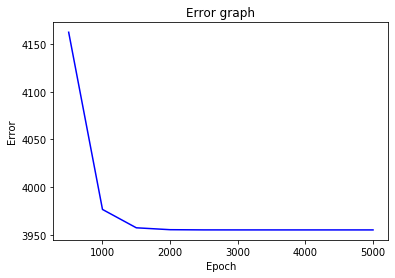

In [10]:
epoch = np.array(list(range(len(error_log)))) * 500 + 500
plt.plot(epoch, error_log, color='b')
plt.title('Error graph')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()

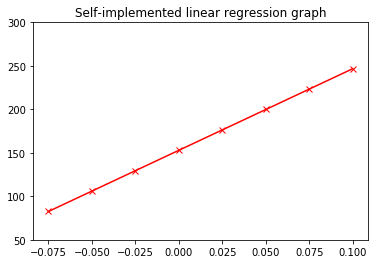

In [11]:
x = np.linspace(-0.075, 0.1, 8)
y = a_0 + a_1 * x
plt.plot(x, y, color='red', marker='x')
plt.yticks(list(range(50, 350, 50)))
plt.title('Self-implemented linear regression graph')
plt.show()

## Logistic Regression
In statistics, the logistic model (or logit model) is used to model the probability of a certain class or event existing such as pass/fail, win/lose, alive/dead or healthy/sick.

$$f: \mathbf{X} \rightarrow y, \text{where } \mathbf{X} \in \mathbb{R}^N \text{ and } y \in (0,1),\\
y = \sigma(a_0 + \sum_{i=1}^N a_i x_i),
\text{ where } \sigma(t) = { 1 \over { 1 + e^{-t}}} = { e^{t} \over { e^{t} + 1 }}$$

### Logistic Function

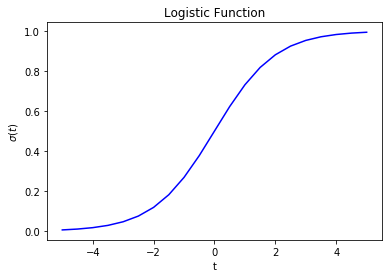

In [12]:
t = np.linspace(-5, 5, 21)
sigma = 1 / (1 + np.exp(-t))
plt.plot(t, sigma, color='b')
plt.title('Logistic Function')
plt.xlabel('t')
plt.ylabel(r'$\sigma(t)$')
plt.show()

### Logistic Function over 2-D Space

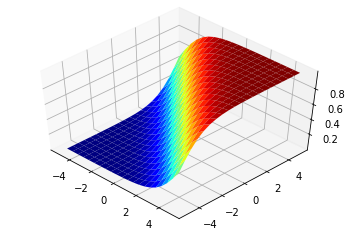

In [13]:
from mpl_toolkits import mplot3d

x, y = np.meshgrid(np.linspace(-5, 5, 21), np.linspace(-5, 5, 21))
z = 1 / (1 + np.exp(-(x+y)))
ax = plt.axes(projection='3d')
ax.plot_surface(x, y, z, cmap='jet')
ax.view_init(50, -45)
plt.show()

### Application of logistic regression to the two-class classification problem

In [89]:
iris_X, iris_y = sklearn.datasets.load_iris(return_X_y=True)
print(iris_X.shape, iris_y.shape)
length = len(iris_y[iris_y<=1]) # The number of data that the label is 0 or 1.
iris_X = iris_X[:length,:2]
iris_y = iris_y[:length]
print(iris_X.shape, iris_y.shape)

(150, 4) (150,)
(100, 2) (100,)


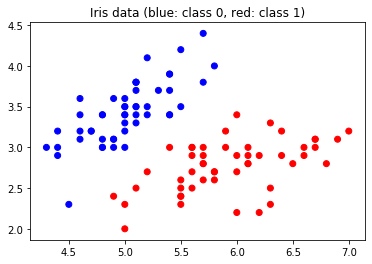

In [94]:
color = ['b' if label==0 else 'r' for label in iris_y]
plt.scatter(iris_X[:,0], iris_X[:,1], color=color)
plt.title('Iris data (blue: class 0, red: class 1)')
plt.show()

In [91]:
classifier = sklearn.linear_model.LogisticRegression(solver='liblinear')
_ = classifier.fit(X, y)

In [92]:
test_X = np.array(np.meshgrid(np.linspace(4.5, 7.0, 26),
                              np.linspace(2.0, 4.5, 26))).T.reshape(-1, 2)
test_y = classifier.predict_proba(test_X)
print(test_X.shape, ':', test_X[0])
print(test_y.shape, ':', test_y[0])
print(classifier.classes_)

(676, 2) : [4.5 2. ]
(676, 2) : [0.11877444 0.88122556]
[0 1]


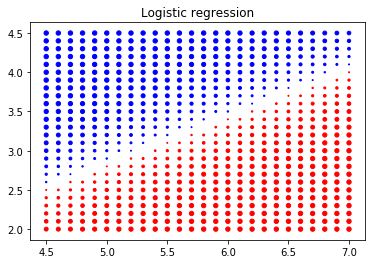

In [98]:
color = ['b' if score[0] >= 0.5 else 'r' for score in test_y]
size = [int(max(score) * 40 - 20) for score in test_y]
plt.scatter(test_X[:,0], test_X[:,1], color=color, s=size)
plt.title('Logistic regression')
plt.show()

## Reference
- https://en.wikipedia.org/wiki/Linear_regression
- https://campus.datacamp.com/courses/linear-classifiers-in-python
- https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
- https://en.wikipedia.org/wiki/Mean_squared_error
- https://en.wikipedia.org/wiki/Logistic_regression